In [20]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [34]:
#Preprocessing dataset
batch_size = 32
img_height = 180
img_width = 180
#Training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'TLD_dataset-20201130T034909Z-001/TLD_dataset/training_set',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
#Validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'TLD_dataset-20201130T034909Z-001/TLD_dataset/test_set',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 518 files belonging to 3 classes.
Using 415 files for training.
Found 121 files belonging to 3 classes.
Using 24 files for validation.
['green', 'red', 'yellow']


In [35]:
#Creating model

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])

In [36]:
#Compiling model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [37]:
#Training model
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True
)

Epoch 1/10
13/13 [==============================] - 4s 294ms/step - loss: 1.5567 - accuracy: 0.4072 - val_loss: 1.1216 - val_accuracy: 0.2917
Epoch 2/10
13/13 [==============================] - 4s 292ms/step - loss: 1.0359 - accuracy: 0.4964 - val_loss: 1.1161 - val_accuracy: 0.2917
Epoch 3/10
13/13 [==============================] - 4s 289ms/step - loss: 1.0176 - accuracy: 0.5036 - val_loss: 1.1800 - val_accuracy: 0.2917
Epoch 4/10
13/13 [==============================] - 4s 300ms/step - loss: 0.9910 - accuracy: 0.5084 - val_loss: 1.1171 - val_accuracy: 0.2917
Epoch 5/10
13/13 [==============================] - 4s 289ms/step - loss: 0.9523 - accuracy: 0.5663 - val_loss: 1.2294 - val_accuracy: 0.2917
Epoch 6/10
13/13 [==============================] - 4s 291ms/step - loss: 0.9264 - accuracy: 0.5807 - val_loss: 0.9365 - val_accuracy: 0.5000
Epoch 7/10
13/13 [==============================] - 4s 303ms/step - loss: 0.9201 - accuracy: 0.5976 - val_loss: 0.8813 - val_accuracy: 0.5000
Epoch 

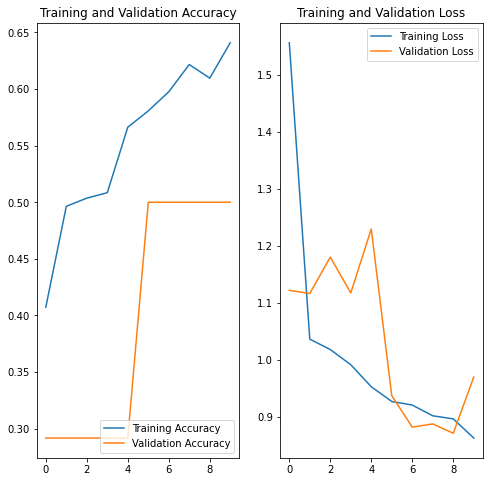

In [38]:
#Plot acc. vs loss for Training and Validation sets
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

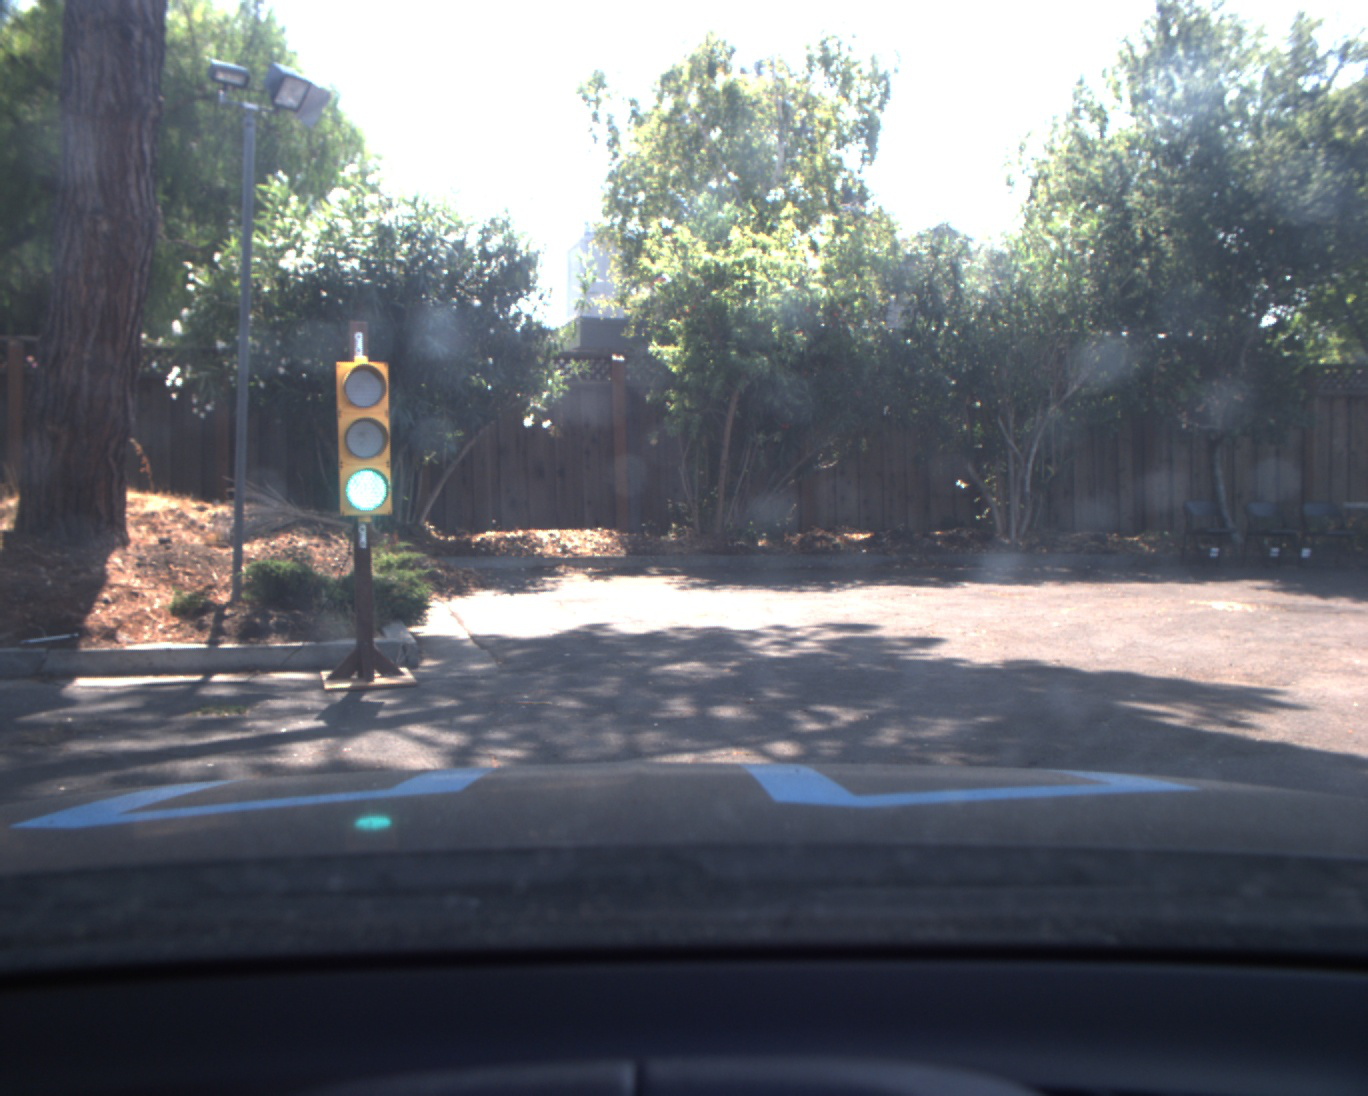

In [7]:
#Predicting on images(green)
PIL.Image.open('TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left1116.jpg')

In [39]:

img = keras.preprocessing.image.load_img(
    'TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left1116.jpg', target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(score)
print("\n This image is a {} signal with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

tf.Tensor([0.65771157 0.3250078  0.01728062], shape=(3,), dtype=float32)

 This image is a green signal with a 65.77 percent confidence.


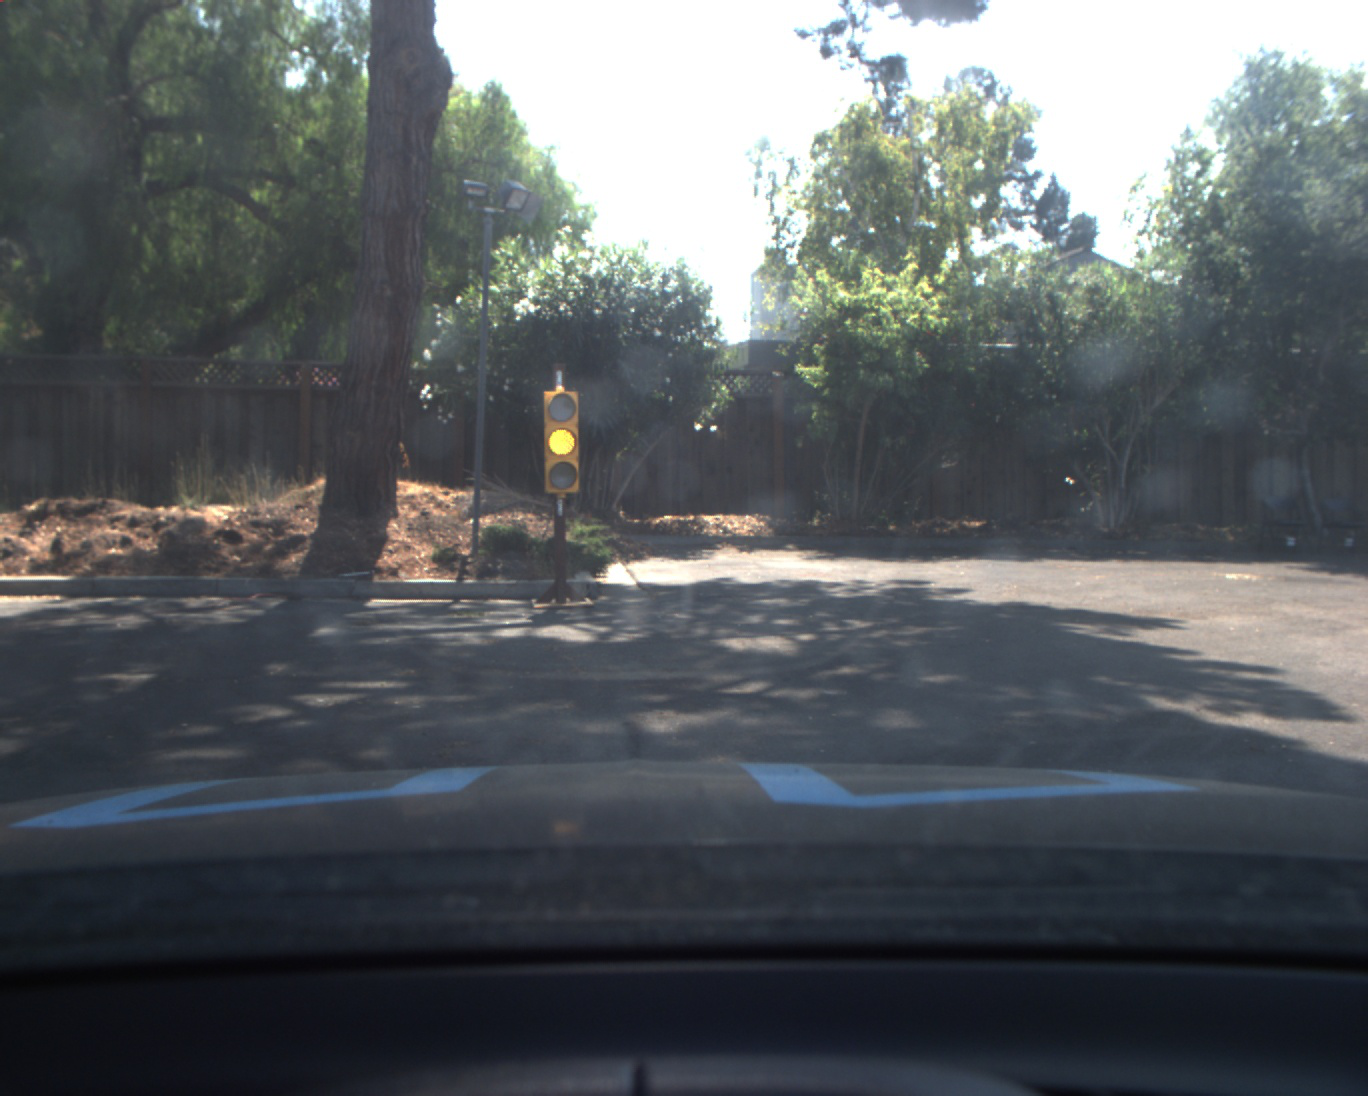

In [9]:
#Predicting on images(yellow)
PIL.Image.open('TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left0136.jpg')

In [40]:

img = keras.preprocessing.image.load_img('TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left0136.jpg', target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(score)
print("\n This image is a {} signal with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

tf.Tensor([0.6214169  0.31227812 0.06630491], shape=(3,), dtype=float32)

 This image is a green signal with a 62.14 percent confidence.


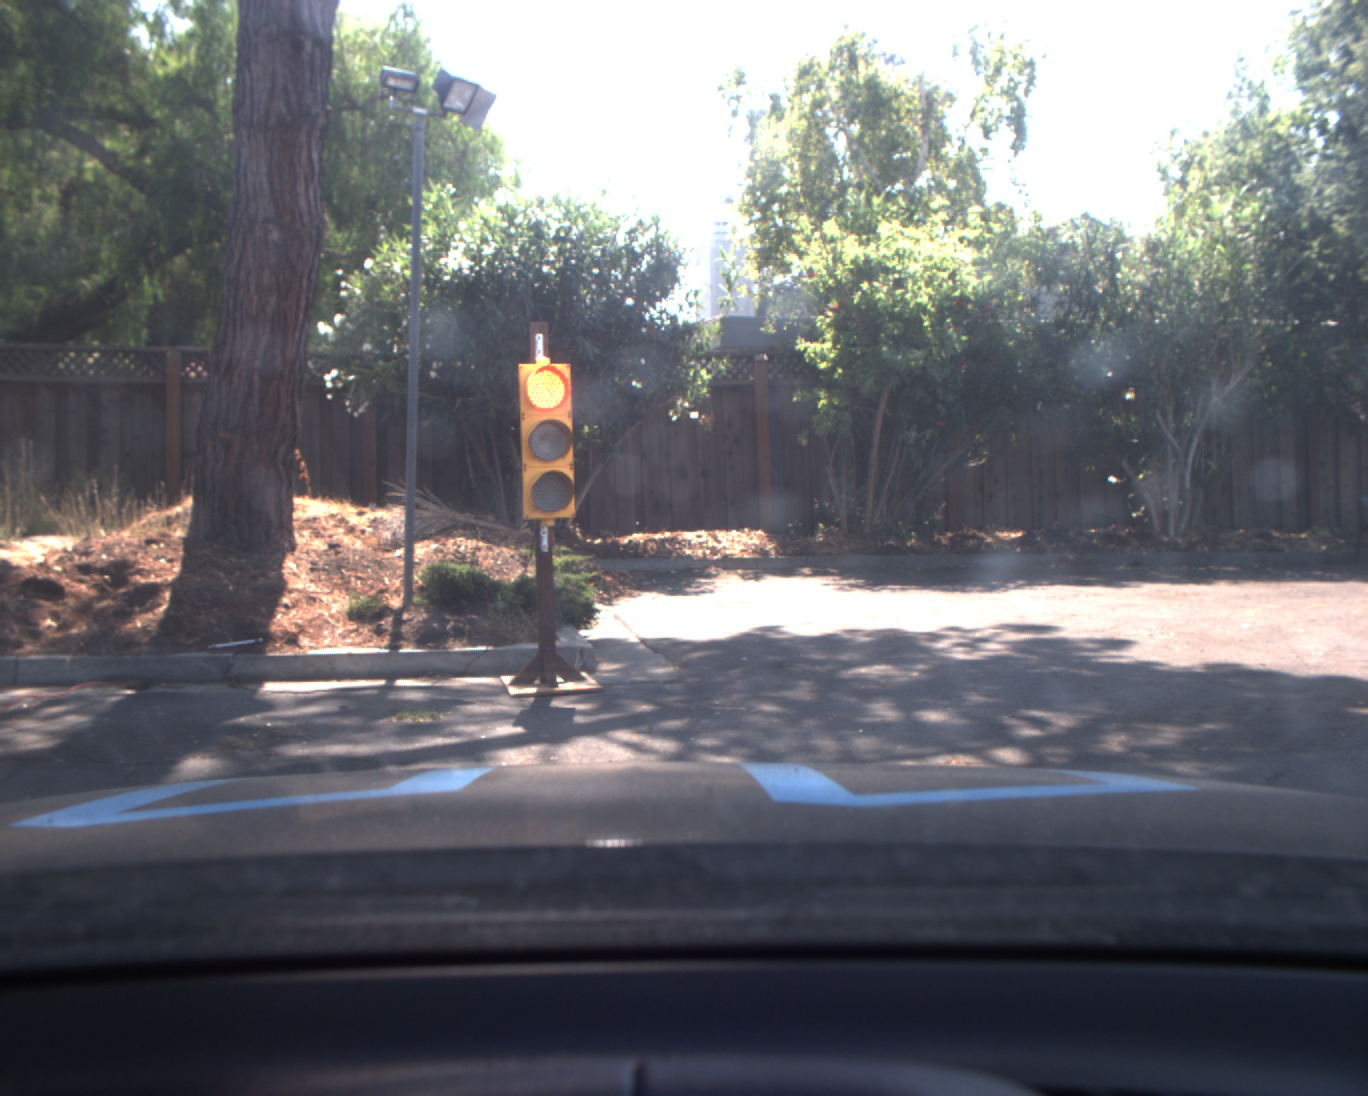

In [11]:
#Predicting on images(red)
PIL.Image.open('TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left0721.jpg')

In [41]:

img = keras.preprocessing.image.load_img(
    'TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left0721.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("\n This image is a {} signal with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


 This image is a green signal with a 59.32 percent confidence.


(1, 180, 180, 3)
(1, 180, 180, 16)
(1, 90, 90, 16)
(1, 90, 90, 32)
(1, 45, 45, 32)
(1, 45, 45, 64)
(1, 22, 22, 64)
(1, 22, 22, 64)
(1, 30976)
(1, 128)
(1, 3)


C:\Users\sudha\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


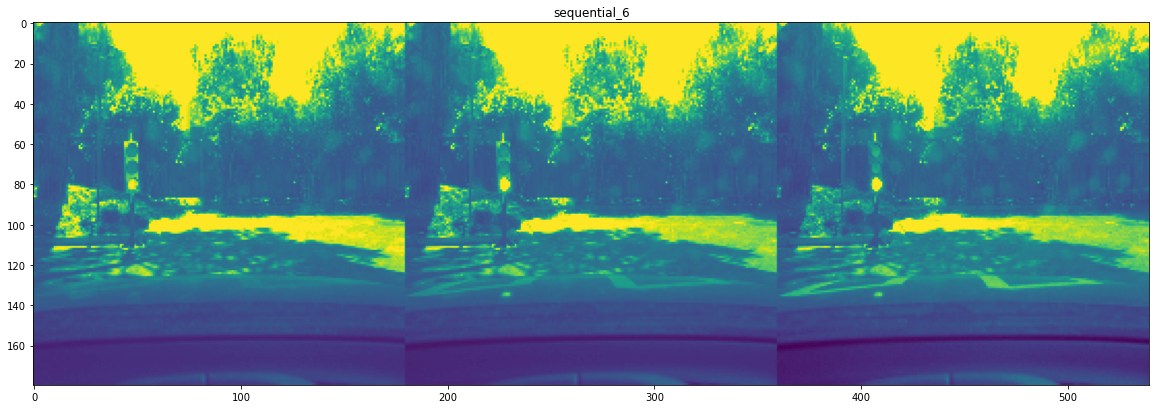

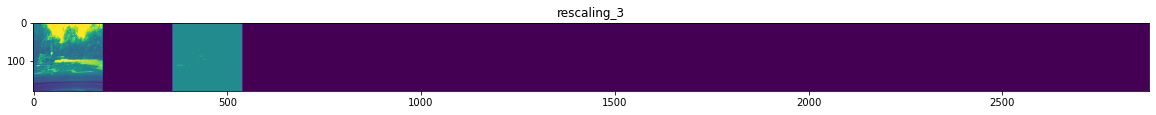

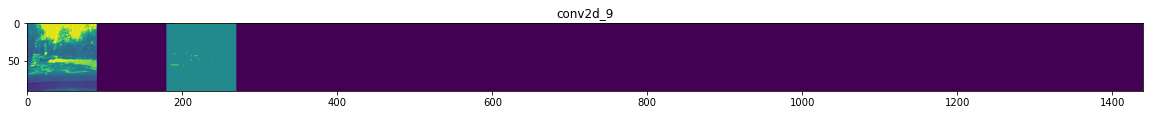

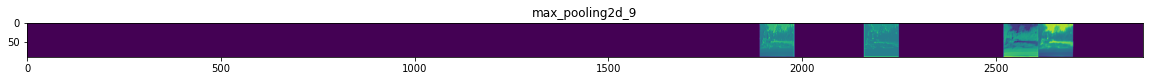

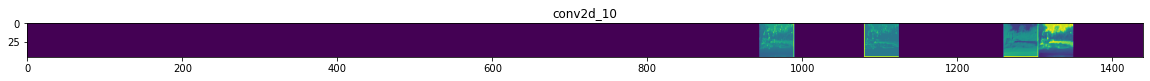

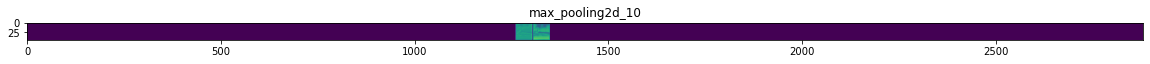

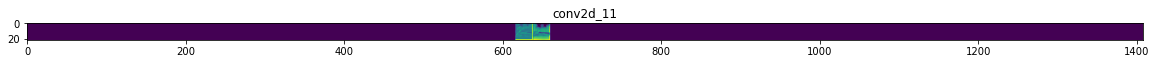

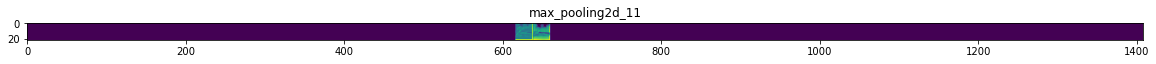

In [42]:
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = keras.preprocessing.image.load_img('TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left1116.jpg', target_size=(180, 180))
# Convert ht image to Array of dimension (150,150,3)
x   = keras.preprocessing.image.img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

(1, 180, 180, 3)
(1, 180, 180, 16)
(1, 90, 90, 16)
(1, 90, 90, 32)
(1, 45, 45, 32)
(1, 45, 45, 64)
(1, 22, 22, 64)
(1, 22, 22, 64)
(1, 30976)
(1, 128)
(1, 3)


C:\Users\sudha\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


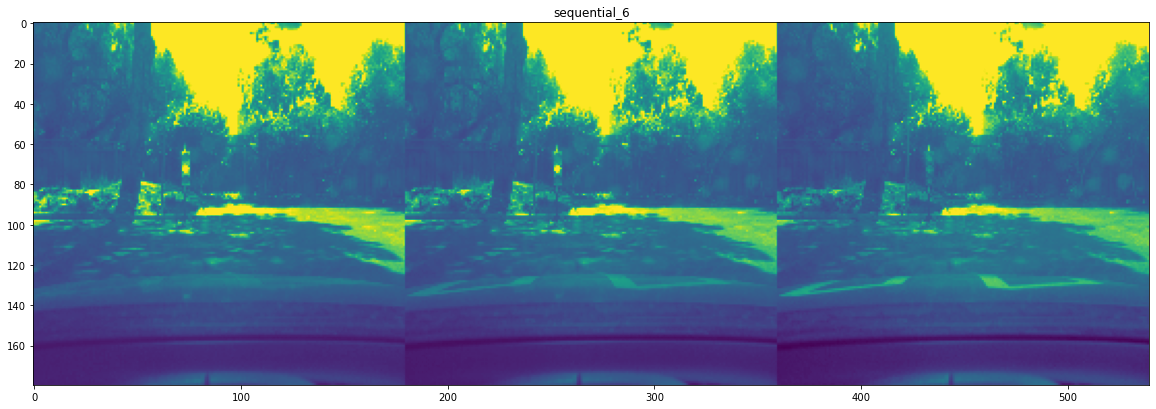

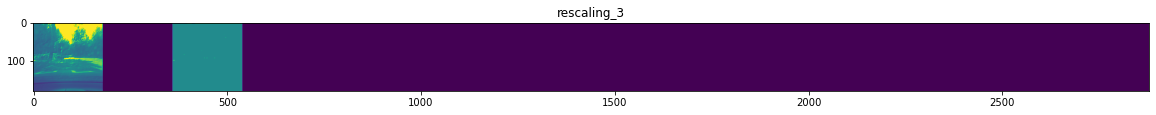

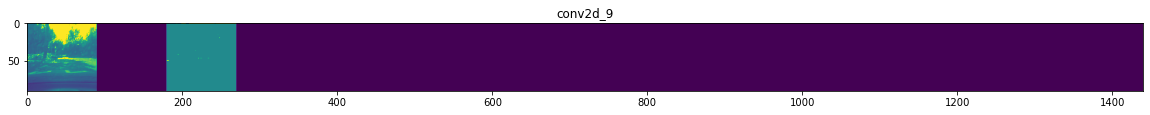

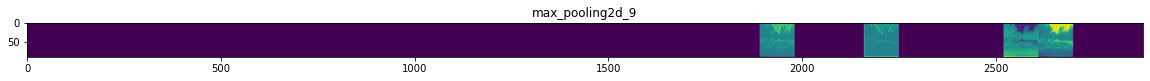

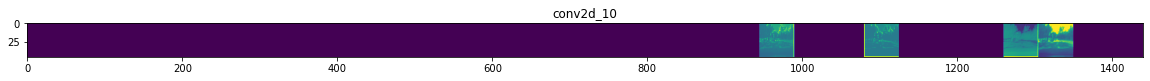

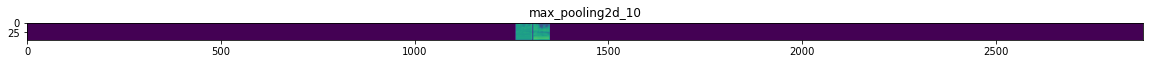

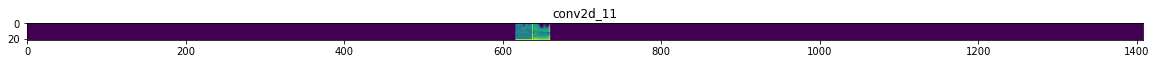

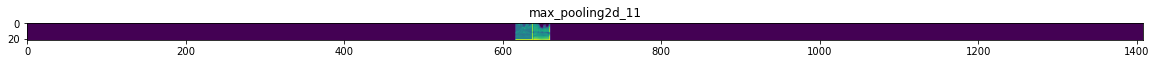

In [43]:
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = keras.preprocessing.image.load_img('TLD_dataset-20201130T034909Z-001/TLD_dataset/single_prediction/left0136.jpg', target_size=(180, 180))
# Convert ht image to Array of dimension (150,150,3)
x   = keras.preprocessing.image.img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )